# QPG with parameter array $[[12, 2, 1, 12, 12], [6, 0, 4, 1; 0, 0, 1; 0, 1; 4]]$

Consider a parameter set for a $5$-class association scheme $\mathcal{A} = (X, \mathcal{R} = \{R_0 = \operatorname{Id}_X, R_1, R_2, R_3, R_4, R_5\})$ with $40$ vertices with the intersection numbers $p^h_{ij}$ ($0 \le h, i, j \le 5$) given below.

In [1]:
%display latex
import drg
from eigenspace import Eigenspace, VectorError, relmatrix

In [2]:
p = drg.ASParameters(p=list(zip(*
  [[[ 1,  0, 0, 0,  0,  0 ], [ 0, 1, 0, 0, 0, 0 ], [ 0, 0, 1, 0,  0, 0 ], [ 0,  0, 0, 1,  0,  0 ], [ 0, 0, 0, 0, 1, 0 ], [ 0, 0, 0, 0, 0, 1 ]], 
   [[ 0, 12, 0, 0,  0,  0 ], [ 1, 5, 1, 0, 4, 1 ], [ 0, 6, 0, 0,  0, 6 ], [ 0,  0, 0, 0,  0, 12 ], [ 0, 4, 0, 0, 4, 4 ], [ 0, 1, 1, 1, 4, 5 ]], 
   [[ 0,  0, 2, 0,  0,  0 ], [ 0, 1, 0, 0, 0, 1 ], [ 1, 0, 0, 1,  0, 0 ], [ 0,  0, 2, 0,  0,  0 ], [ 0, 0, 0, 0, 2, 0 ], [ 0, 1, 0, 0, 0, 1 ]], 
   [[ 0,  0, 0, 1,  0,  0 ], [ 0, 0, 0, 0, 0, 1 ], [ 0, 0, 1, 0,  0, 0 ], [ 1,  0, 0, 0,  0,  0 ], [ 0, 0, 0, 0, 1, 0 ], [ 0, 1, 0, 0, 0, 0 ]], 
   [[ 0,  0, 0, 0, 12,  0 ], [ 0, 4, 0, 0, 4, 4 ], [ 0, 0, 0, 0, 12, 0 ], [ 0,  0, 0, 0, 12,  0 ], [ 1, 4, 2, 1, 0, 4 ], [ 0, 4, 0, 0, 4, 4 ]], 
   [[ 0,  0, 0, 0,  0, 12 ], [ 0, 1, 1, 1, 4, 5 ], [ 0, 6, 0, 0,  0, 6 ], [ 0, 12, 0, 0,  0,  0 ], [ 0, 4, 0, 0, 4, 4 ], [ 1, 5, 1, 0, 4, 1 ]]]
)))
p.Q

[   1    5    4   10   15    5]
[   1  5/2  2/3    0 -5/2 -5/3]
[   1    0    4  -10    0    5]
[   1   -5    4   10  -15    5]
[   1    0 -8/3    0    0  5/3]
[   1 -5/2  2/3    0  5/2 -5/3]

The graph $\Gamma_1 = (X, R_1)$ is a quotient-polynomial graph with parameter array $[[12, 2, 1, 12, 12], [6, 0, 4, 1; 0, 0, 1; 0, 1; 4]]$. From the intersection numbers and the dual eigenmatrix above, we can see that the association scheme $\mathcal{A}$ is imprimitive with imprimitivity set $\tilde{0} = \{0, 2, 3\}$ and dual imprimitivity set $\overline{0} = \{0, 2, 5\}$. Note that we also have $\tilde{1} = \tilde{5} = \{1, 5\}$, $\tilde{4} = \{4\}$, $\overline{1} = \overline{4} = \{1, 4\}$ and $\overline{3} = \{3\}$. Let us examine the parameters of subschemes of $\mathcal{A}$ corresponding to $\tilde{0}$.

In [3]:
p23 = p.subset(2, 3)
p23.p

0: [1 0 0]
   [0 2 0]
   [0 0 1]

1: [0 1 0]
   [1 0 1]
   [0 1 0]

2: [0 0 1]
   [0 2 0]
   [1 0 0]

These parameters uniquely define the association scheme corresponding to the complete bipartite graph $K_{2,2}$. Let us also examine its dual eigenmatrix.

In [4]:
p23.Q

[ 1  2  1]
[ 1  0 -1]
[ 1 -2  1]

Let us also examine the parameters of the corresponding quotient scheme $\tilde{\mathcal{A}}$. These parameters uniquely define the Johnson scheme $J(5, 2)$ corresponding to the Petersen graph and its complement, the triangular graph $T(5)$.

In [5]:
q23 = p.quotient(2, 3)
q23.p

0: [1 0 0]
   [0 6 0]
   [0 0 3]

1: [0 1 0]
   [1 3 2]
   [0 2 1]

2: [0 0 1]
   [0 4 2]
   [1 2 0]

We will consider embeddings of subschemes of $\mathcal{A}$ corresponding to $\tilde{0}$ into its eigenspace $S_1$ of dimension $m_1 = 5$. Let us obtain the inner products (i.e., cosines of the angles) between unit vectors $u'_x$ for the vertices $x \in X$ corresponding to the relation they are in.

In [6]:
si = 1
m = p.Q[0, si]
angles, = zip(*(p.Q[:, si] / p.Q[0, si]))
angles

(1, 1/2, 0, -1, 0, -1/2)

Since the graphs $\Gamma_2 = (X, R_2)$ and $\Gamma_3 = (X, R_3)$ are isomorphic to $10 K_{2,2}$ and $20 K_2$, respectively, we may consider a single $R_2$-biclique $X_1$ (i.e., the set of vertices of a connected component of $\Gamma_2$) and find the coefficients for the vectors $u'_x$ ($x \in X_1$).

In [7]:
S = Eigenspace(m, angles)
G11 = G41 = Graph(4)
G21 = graphs.CompleteBipartiteGraph(2, 2)
G31 = G21.complement()
R1 = relmatrix(G11, G21, G31, G41)
S.vectors(R1)

[ 1  0  0  0  0]
[-1  0  0  0  0]
[ 0  1  0  0  0]
[ 0 -1  0  0  0]

Let us now consider two $R_2$-bicliques, say, $X_2$ and $X_3$, such that pairs of vertices from $X_2$ and $X_3$ are in relation $R_4$ - note that this corresponds to adjacency in the Petersen graph $\tilde{\Gamma}_{\tilde{4}}$. Again, let us find the coefficients for the vectors $u'_x$ ($x \in X_2 \cup X_3$).

In [8]:
G12 = Graph(8)
G22 = 2 * G21
G32 = 2 * G31
G42 = Graph([range(8), [(i, j) for i in range(4) for j in range(4, 8)]], format='vertices_and_edges')
R2 = relmatrix(G12, G22, G32, G42)
S.vectors(R2)

[ 1  0  0  0  0]
[-1  0  0  0  0]
[ 0  1  0  0  0]
[ 0 -1  0  0  0]
[ 0  0  1  0  0]
[ 0  0 -1  0  0]
[ 0  0  0  1  0]
[ 0  0  0 -1  0]

Let us now consider three $R_2$-bicliques, say, $X_1$, $X_2$ and $X_3$, such that pairs of vertices from $X_1$ and $X_3$ and from $X_2$ and $X_3$ are in relation $R_4$, and define $X^{(3)} = X_1 \cup X_2 \cup X_3$. Since $p^4_{44} = 0$, pairs of vertices from $X_1$ and $X_2$ cannot be in relation $R_4$, and must be in relation $R_1$ or $R_5$ instead. As $1 + p^1_{12} + p^1_{13} = p^5_{12} + p^5_{13} = 2$, it follows that the graph $\Gamma^{(3)}_1 = (X^{(3)}, R_1|_{X^{(3)}})$ consists of a union of cycles of lengths divisible by $4$ and four isolated vertices. In particular, since $p^1_{12} = 1$ and $p^1_{13} = 0$, the two neighbours of a non-isolated vertex of $\Gamma^{(3)}_1$ must be in relation $R_2$. The graph $\Gamma^{(3)}_1$ is therefore isomorphic to $4K_1 + C_8$ or $4K_1 + 2C_4$, and the choice of this graph uniquely determines the scheme $\mathcal{A}|_{X^{(3)}}$. Let us try to find the coefficients for the vectors $u'_x$ ($x \in X^{(3)}$) in each of these cases.

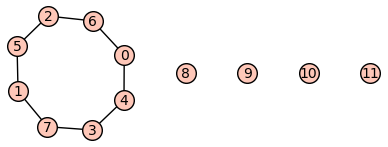

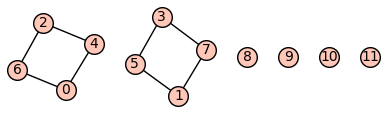

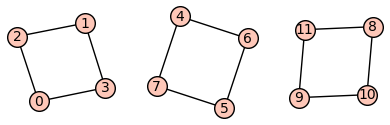

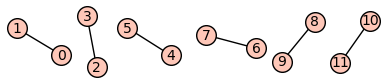

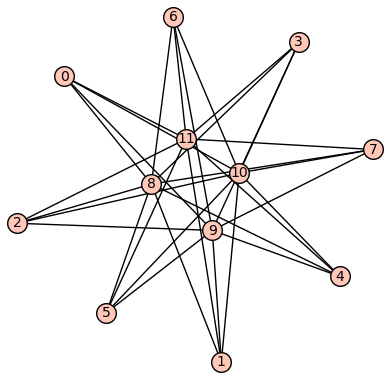

In [9]:
G23 = 3 * G21
G33 = 3 * G31
G43 = Graph([range(12), [(i, j) for i in range(8) for j in range(8, 12)]], format='vertices_and_edges')
G13s = [Graph([range(12), [(0, 4), (0, 6), (1, 5), (1, 7), (2, 5), (2, 6), (3, 4), (3, 7)]], format='vertices_and_edges'),
        Graph([range(12), [(i+h, j+h) for i in (0, 2) for j in (4, 6) for h in (0, 1)]], format='vertices_and_edges')]
for G in [*G13s, G23, G33, G43]:
    G.show()

In [10]:
R3s = [relmatrix(G13, G23, G33, G43) for G13 in G13s]
d = {}
for i, R in enumerate(R3s):
    try:
        d[i] = S.vectors(R)
        print(f"Graph {i}: found embedding!")
    except VectorError as ex:
        print(f"Graph {i}: {ex} (row {ex.row}, diff {ex.diff})")
len(d)

Graph 0: The norm of the obtained vector is smaller than one! (row 10, diff 1)
Graph 1: found embedding!


1

We see that the scheme $\mathcal{A}|_{X^{(3)}}$ only admits an embedding into $S_1$ if $\Gamma^{(3)}_1$ is isomorphic to $4K_1 + 2C_4$. Let us examine the matrices of the coefficients for the vectors $u'_x$ ($x \in X^{(3)}$) in this case.

In [11]:
d[1]

[             1              0              0              0              0]
[            -1              0              0              0              0]
[             0              1              0              0              0]
[             0             -1              0              0              0]
[           1/2            1/2  1/2 * sqrt(2)              0              0]
[          -1/2           -1/2 -1/2 * sqrt(2)              0              0]
[           1/2            1/2 -1/2 * sqrt(2)              0              0]
[          -1/2           -1/2  1/2 * sqrt(2)              0              0]
[             0              0              0              1              0]
[             0              0              0             -1              0]
[             0              0              0              0              1]
[             0              0              0              0             -1]

We will try to determine the coefficients for the vectors $u'_y$ for the remaining vertices $y \in X \setminus X^{(3)}$. Such a vertex may be in relation $R_4$ with all vertices in at most one of $X_1, X_2, X_3$, and is in relations $R_1$ and $R_5$ with two vertices from each of the remainder of these sets which are mutually in relation $R_2$. Since the matrix of the coefficients for the vectors $u'_x$ ($x \in X^{(3)}$) has full column rank, the orthonormal basis in which these vectors are expressed is uniquely determined, allowing us to attempt to find the remaining unit vectors $u'_y$.

In [12]:
vs = []
for i in range(4):
    for t in cartesian_product([[(4, 4, 4, 4)] if i == j else [(1, 5, 1, 5), (5, 1, 1, 5), (5, 1, 5, 1), (1, 5, 5, 1)] for j in range(3)]):
        try:
            v = S.vector(d[1], sum(t, ()))
            if v.norm() == 1:
                vs.append(v)
        except VectorError:
            pass
len(vs)

28

We find $28$ vectors, which exactly matches the number of missing vertices. Let us build a graph with these vectors as its vertices, with two vectors being adjacent when their inner product takes one of the expected values.

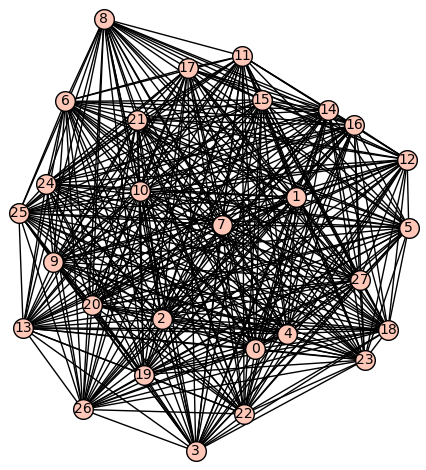

In [13]:
Gr = Graph([range(len(vs)), lambda i, j: i != j and vs[i] * vs[j] in angles])
Gr.plot()

Let us verify that this graph is complete.

In [14]:
Gr.is_regular(Gr.order() - 1)

True

Since $Q_{21} = Q_{41} = 0$, we cannot deduce the relation matrix of the obtained scheme from inner products of the vectors alone. However, since the values $p^h_{11}$ ($0 \le h \le 5$) are all distinct, we can build the graph $\Gamma_1 = (X, R_1)$ and deduce the relation for each pair of vertices by their number of common neighbours in $\Gamma_1$.

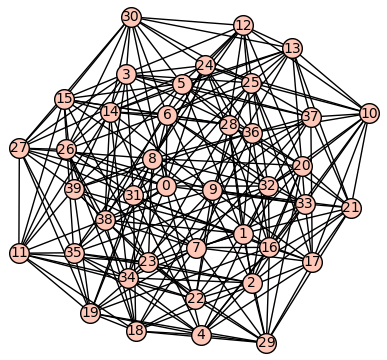

In [15]:
V = Matrix([*d[1], *vs])
A = V * V.transpose()
G1 = Graph([range(V.nrows()), lambda u, v: A[u, v] == angles[1]])
G1.show()

In [16]:
c = [p.p[h, 1, 1] for h in range(6)]
R = Matrix([[c.index(len(Set(G1[u]) & Set(G1[v]))) for v in G1] for u in G1])
R

40 x 40 dense matrix over Integer Ring (use the '.str()' method to see the entries)

Let us verify that the above relation matrix corresponds to an association scheme with the intersection numbers of $\mathcal{A}$.

In [17]:
all(t.count((i, j)) == p.p[R[u][v], i, j] for u, v in Combinations(R.nrows(), 2)
    for t in [tuple(zip(R[u], R[v]))] for i in range(6) for j in range(6))

True

We thus see that there is, up to isomorphism, **precisely one** association scheme with the parameters given above.

We build an alternative spherical representation of $\mathcal{A}$ by taking the vectors ${\sqrt{2} \over 2} (\pm e_i \pm e_j)$ ($1 \le i < j \le 5$). Let us verify that the corresponding graph for the relation $R_1$ is isomorphic to $\Gamma_1$.

In [18]:
I = identity_matrix(5)
U = Matrix([(s*I[i] + t*I[j])/sqrt(2) for i in range(5) for j in range(i+1, 5) for s in (-1, 1) for t in (-1, 1)])
B = U*U.transpose()
H1 = Graph([range(U.nrows()), lambda u, v: B[u, v] == angles[1]])
H1.is_isomorphic(G1)

True

Let us now examine some properties of the graph $\Gamma_1$.

In [19]:
G1.diameter(), G1.girth(), G1.is_arc_transitive(), G1.is_cayley()

(3, 3, True, False)

In [20]:
A1 = G1.automorphism_group()
A1.order(), A1.gap().StructureDescription()

(3840, "C2 x ((C2 x C2 x C2 x C2) : S5)")

We see that the automorphism group of $\Gamma_1$ has order $3840$ and is isomorphic to $Z_2 \times (Z_2^4 \rtimes S_5)$. Let us verify that this is also the automorphism group of $\mathcal{A}$.

In [21]:
all(A1.is_subgroup(Graph([range(R.nrows()), lambda u, v: R[u, v] == i]).automorphism_group()) for i in range(2, 6))

True

The automorphism group of $\mathcal{A}$ acts transitively on the arcs of $\Gamma_1$. Let us verify that it acts transitively on all relations of $\mathcal{A}$ - i.e., the orbit sizes of the vertex stabilizer match the valencies of $\mathcal{A}$.

In [22]:
[len(o) for o in A1.stabilizer(0).orbits()]

[1, 1, 2, 12, 12, 12]